In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), 
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

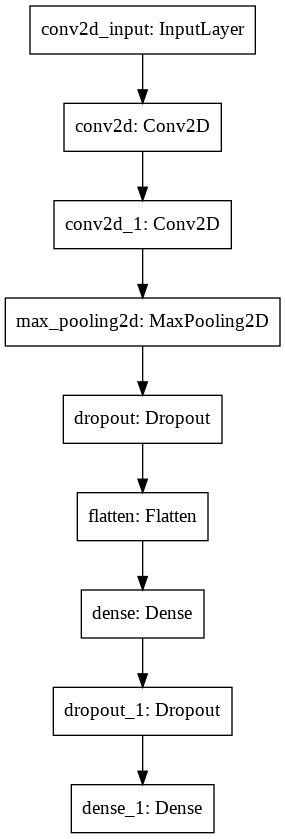

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [9]:
!ls -l

total 32
drwxr-xr-x 2 root root  4096 Feb  8 03:11 model
-rw-r--r-- 1 root root 23744 Feb  8 03:11 model.png
drwxr-xr-x 1 root root  4096 Feb  4 15:26 sample_data


In [10]:
modelpath = MODEL_DIR + "mnist-cnn-{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [11]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=30,
                    batch_size=200, #epochs=5, verbose=2, 
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
240/240 [==============================] - 10s 12ms/step - loss: 0.6063 - accuracy: 0.8087 - val_loss: 0.0728 - val_accuracy: 0.9797

Epoch 00001: val_loss improved from inf to 0.07280, saving model to ./model/mnist-cnn-01-0.0728.hdf5
Epoch 2/30
240/240 [==============================] - 3s 11ms/step - loss: 0.1033 - accuracy: 0.9694 - val_loss: 0.0545 - val_accuracy: 0.9841

Epoch 00002: val_loss improved from 0.07280 to 0.05449, saving model to ./model/mnist-cnn-02-0.0545.hdf5
Epoch 3/30
240/240 [==============================] - 3s 11ms/step - loss: 0.0671 - accuracy: 0.9796 - val_loss: 0.0441 - val_accuracy: 0.9872

Epoch 00003: val_loss improved from 0.05449 to 0.04408, saving model to ./model/mnist-cnn-03-0.0441.hdf5
Epoch 4/30
240/240 [==============================] - 3s 11ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.0401 - val_accuracy: 0.9885

Epoch 00004: val_loss improved from 0.04408 to 0.04006, saving model to ./model/mnist-cnn-04-0.0401.hdf5
Epoch 5

In [12]:
!ls model

mnist-cnn-01-0.0728.hdf5  mnist-cnn-04-0.0401.hdf5  mnist-cnn-08-0.0349.hdf5
mnist-cnn-02-0.0545.hdf5  mnist-cnn-05-0.0387.hdf5
mnist-cnn-03-0.0441.hdf5  mnist-cnn-07-0.0381.hdf5


In [16]:
from keras.models import load_model
# del model
model = load_model('model/mnist-cnn-08-0.0349.hdf5')

In [17]:
# 테스트 정확도 출력 
acc = model.evaluate(X_test, Y_test, verbose=0)[1]
print(f"Test Accuracy:{acc:.4f}")

Test Accuracy:0.9904


In [18]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

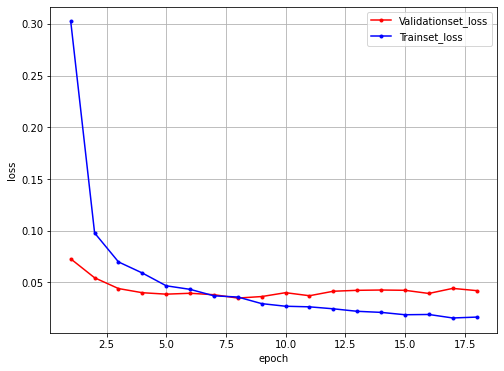

In [19]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### GPU

In [20]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2755006941143570191
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14638920512
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11185046592191653602
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [21]:
!nvidia-smi

Mon Feb  8 03:13:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    28W /  70W |   1129MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------